In [77]:
# Dependencies
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint

In [79]:
%%bash
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=7143e0e6ac66097f604f4ee06c6bdef85e9db80b7c081740eb01dff810d6507f
  Stored in directory: c:\users\ggarz\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [81]:
import plotly
import plotly.graph_objs as go

In [2]:
# Import keys for Covid19Api webpage
from DS6_config import DS601key
from DS6_config import emp_key

In [4]:
froms = []
tos = []
confirmed = []
deaths = []
country = []
country = 'united states of america'
fromdate = '2020-01-01'
todate = '2021-03-01'
confirmed_url = f'https://api.covid19api.com/total/country/{country}/status/confirmed?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
deaths_url = f'https://api.covid19api.com/total/country/{country}/status/deaths?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
response_deaths = requests.get(deaths_url).json() 
response_confirmed = requests.get(confirmed_url).json()
country

'united states of america'

In [5]:
day_cumulated_deaths=[]
day_cumulated_confirmed=[]
country_data=[]
date_data = []
for day in response_deaths:
     day_cumulated_deaths.append(day['Cases'])
for day in response_confirmed:
    day_cumulated_confirmed.append(day['Cases'])
    country_data.append(country)
    date_data.append(day['Date'][0:10])

In [82]:
dict_cases = {'date': date_data, 'country': country_data, 'confirmed': day_cumulated_confirmed, 'deaths': day_cumulated_deaths}  
    
dfusa = pd.DataFrame(dict_cases) 
dfusa

,date,country,confirmed,deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
...,...,...,...,...
387,2021-02-12,united states of america,27492023,482142
388,2021-02-13,united states of america,27575344,484301
389,2021-02-14,united states of america,27640282,485384
390,2021-02-15,united states of america,27694226,486325


In [7]:
dfusa.to_excel("usa.xlsx")
print(dfusa)

           date                   country  confirmed  deaths
0    2020-01-22  united states of america          1       0
1    2020-01-23  united states of america          1       0
2    2020-01-24  united states of america          2       0
3    2020-01-25  united states of america          2       0
4    2020-01-26  united states of america          5       0
..          ...                       ...        ...     ...
387  2021-02-12  united states of america   27492023  482142
388  2021-02-13  united states of america   27575344  484301
389  2021-02-14  united states of america   27640282  485384
390  2021-02-15  united states of america   27694226  486325
391  2021-02-16  united states of america   27756624  488081

[392 rows x 4 columns]


In [83]:
usa = dfusa.rename(columns={'date': 'Date',
                         'country':'Country',
                         'confirmed':'Confirmed',
                         'deaths':'Deaths'})
usa.head(10)

,Date,Country,Confirmed,Deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
5,2020-01-27,united states of america,5,0
6,2020-01-28,united states of america,5,0
7,2020-01-29,united states of america,6,0
8,2020-01-30,united states of america,6,0
9,2020-01-31,united states of america,8,0


In [85]:
fecha = pd.to_datetime(usa['Date'])
usa.loc[:,'Date']=fecha
usa.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Deaths                int64
dtype: object

In [86]:
usa1 = usa.resample('M',on='Date').max().reset_index(drop=True)
usa1['Confirmed Delta'] = ''
usa1['Deaths Delta'] = ''

for index,row in usa1.iterrows():
    if index == 0:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index,'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths']
    else:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index,'Confirmed'] - usa1.loc[index-1, 'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths'] - usa1.loc[index-1, 'Deaths']
usa1

,Date,Country,Confirmed,Deaths,Confirmed Delta,Deaths Delta
0,2020-01-31,united states of america,8,0,8,0
1,2020-02-29,united states of america,25,1,17,1
2,2020-03-31,united states of america,192301,5334,192276,5333
3,2020-04-30,united states of america,1081019,66366,888718,61032
4,2020-05-31,united states of america,1798713,108107,717694,41741
5,2020-06-30,united states of america,2642081,127980,843368,19873
6,2020-07-31,united states of america,4566931,154585,1924850,26605
7,2020-08-31,united states of america,6025593,184290,1458662,29705
8,2020-09-30,united states of america,7231832,207741,1206239,23451
9,2020-10-31,united states of america,9158771,232335,1926939,24594


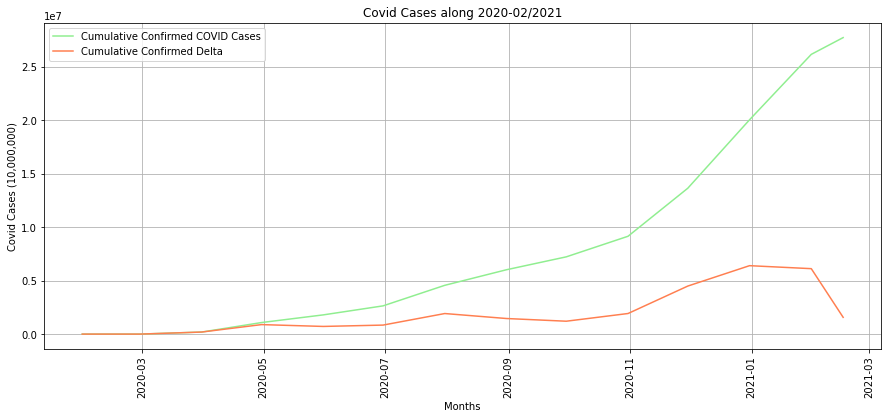

In [87]:
x_axis = usa1['Date']
c_axis = usa1['Confirmed']
cd_axis = usa1['Confirmed Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, c_axis, color = 'lightgreen', label = 'Cumulative Confirmed COVID Cases')
plt.plot(x_axis, cd_axis, color = 'coral', label = 'Cumulative Confirmed Delta')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Covid Cases (10,000,000)')
plt.title('Covid Cases along 2020-02/2021')
plt.legend()
plt.grid()
plt.show()

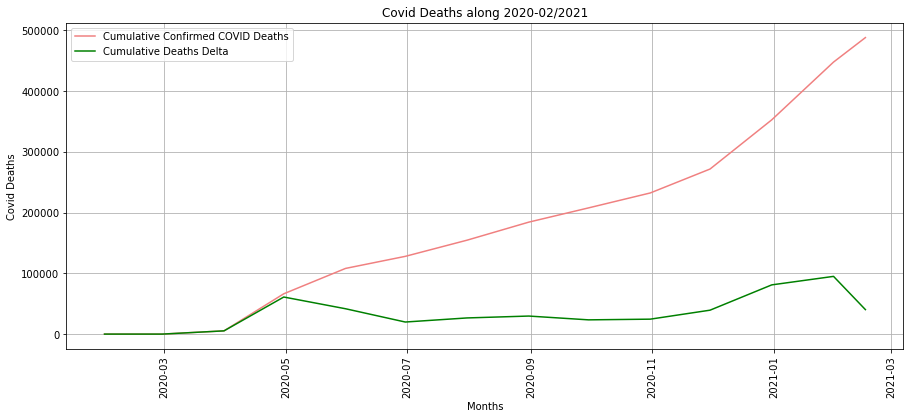

In [88]:
x_axis = usa1['Date']
d_axis = usa1['Deaths']
dd_axis = usa1['Deaths Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, d_axis, color = 'lightcoral', label = 'Cumulative Confirmed COVID Deaths')
plt.plot(x_axis, dd_axis, color = 'green', label = 'Cumulative Deaths Delta')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Covid Deaths')
plt.title('Covid Deaths along 2020-02/2021')
plt.legend()
plt.grid()
plt.show()

In [89]:
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    'data': [go.Scatter(x = x_axis, y = d_axis)],
    'layout' : go.Layout(title = 'Covid Cases along 2020-02/2021')
})

plotly.offline.iplot({
    'data' : [go.Scatter(x = x_axis, y = dd_axis)],
    'layout' : go.Layout(title = 'Covid Cases along 2020-02/2021')
})

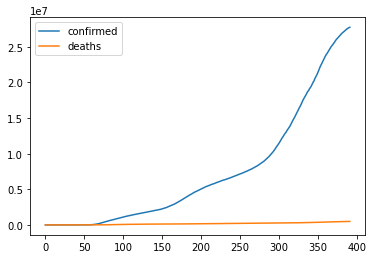

In [8]:
df = pd.DataFrame({
   'confirmed': dfusa['confirmed'],
   'deaths': dfusa['deaths']
   })
lines = df.plot.line()

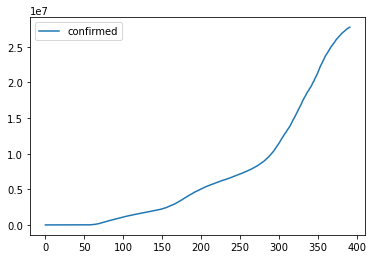

In [9]:
df = pd.DataFrame({
   'confirmed': dfusa['confirmed']
   })
lines = df.plot.line()

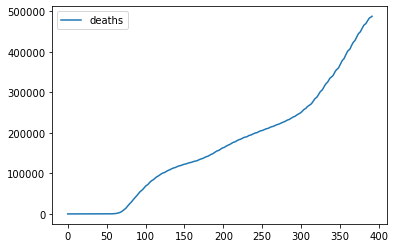

In [10]:
df = pd.DataFrame({
   'deaths': dfusa['deaths']
   })
lines = df.plot.line()

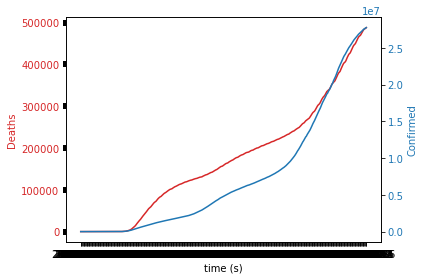

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Deaths', color=color)
ax1.plot(dfusa['date'],dfusa['deaths'], color=color)
ax1.tick_params(axis='y', width=6, labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Confirmed', color=color)  # we already handled the x-label with ax1
ax2.plot(dfusa['date'], dfusa['confirmed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig('COVID_since_Jan_22_2020.png', dpi=1000, bbox_inches='tight')

In [12]:
%%bash
pip install yfinance


In [13]:

# Import yfinance yahoo finance API module
import yfinance as yf

In [14]:
# Test the yahoo finance function .Ticker 
XLK = yf.Ticker("XLK") # pass the name of the ETF or stock as an argument of .Ticker functio
print(XLK) # This returns an object

yfinance.Ticker object <XLK>


In [15]:
# .history function returns the ETF perfomance on a daily basis according to the period you specify 
XLK.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22,25.105283,25.177912,24.621093,24.826874,300500,0.0,0
1998-12-23,25.371591,25.420010,24.911609,25.420010,338300,0.0,0
1998-12-24,25.420006,25.420006,25.226330,25.323168,243700,0.0,0
1998-12-28,25.710525,25.710525,25.250544,25.395802,309300,0.0,0
1998-12-29,25.516845,25.577369,25.177911,25.468426,123800,0.0,0
...,...,...,...,...,...,...,...
2021-02-10,137.130005,137.300003,135.220001,136.380005,4732200,0.0,0
2021-02-11,137.300003,137.970001,136.770004,137.880005,3781900,0.0,0
2021-02-12,137.520004,138.679993,137.139999,138.589996,3376200,0.0,0


# Data Analysis Part I - COVID 19 Period
Gather all the information related to Select Sector SPDR ETFs which are the Unique Exchange Traded Funds (ETFs) that divide the S&P into eleven index funds traded throughout the day on NYSE Arca

In [16]:
# Create a list with the ETFs names of the SPDR
ETF = 'XLE XLU XLK XLB XLP XLY XLI XLC XLV XLF XLRE'.split()
ETF

['XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLC', 'XLV', 'XLF', 'XLRE']

In [17]:
# Use yahoo finance API function .download to return a dataframe with the information of the ETFs daily performance
etf_data= yf.download(tickers= ETF, start='2020-02-01', end='2021-02-01') # define the period (COVID)

[*********************100%***********************]  11 of 11 completed


In [18]:
# Display the pre_covid dataframe
etf_data.head()

Adj Close                                                         \
                  XLB        XLC        XLE        XLF        XLI        XLK   
Date                                                                           
2020-02-03  57.569996  54.086075  49.446842  29.406361  79.460899  95.390213   
2020-02-04  58.587547  54.651222  49.624981  29.689018  80.960342  97.888794   
2020-02-05  59.673592  54.740463  51.490719  30.283579  82.312790  98.461594   
2020-02-06  59.644238  55.424595  50.965687  30.244593  82.577400  99.360291   
2020-02-07  58.793015  55.384933  50.609417  30.137375  81.979576  98.451714   

                                                         ...   Volume  \
                  XLP       XLRE        XLU         XLV  ...      XLC   
Date                                                     ...            
2020-02-03  61.451023  37.957104  66.802864   98.338753  ...  5905700   
2020-02-04  61.820629  38.450054  66.136780  100.068810  ...  3504000   
2020-02-05  62.316669  38.421059  66.407074  101.995476  ...  3771700   
2020-02-06  62.423656  38.585373  66.426369  102.083946  ...  1998100   
2020-02-07  62.501465  38.604706  66.213997  101.287720  ...  2698600   

                                                                       \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2020-02-03  21290400  40168700  15676600  12542800  21797600  6254800   
2020-02-04  19819800  79273300  13597200   9548900  14290900  5309500   
2020-02-05  34382000  51086900  12835800  16348500  20911400  3049300   
2020-02-06  15400600  37044400   8627600   6752800   9628500  2676700   
2020-02-07  13693300  27982500  12394500   8299000  14849000  3216600   

                                         
                 XLU       XLV      XLY  
Date                                     
2020-02-03  13547900  11851800  8082200  
2020-02-04  20692100   9575100  8348600  
2020-02-05  16305100  14131000  6677000  
2020-02-06  14954100   6166500  5519900  
2020-02-07  10696400   6057200  3633800  

[5 rows x 66 columns]

In [19]:
# Select the etf_data close price column
close = etf_data['Close']
close

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-02-03,58.840000,54.549999,52.740002,30.170000,81.080002,96.589996,63.180000,39.270000,69.199997,100.040001,126.209999
2020-02-04,59.880001,55.119999,52.930000,30.459999,82.610001,99.120003,63.560001,39.779999,68.510002,101.800003,128.509995
2020-02-05,60.990002,55.209999,54.919998,31.070000,83.989998,99.699997,64.070000,39.750000,68.790001,103.760002,129.160004
2020-02-06,60.959999,55.900002,54.360001,31.030001,84.260002,100.610001,64.180000,39.919998,68.809998,103.849998,128.869995
2020-02-07,60.090000,55.860001,53.980000,30.920000,83.650002,99.690002,64.260002,39.939999,68.589996,103.040001,128.309998
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,73.989998,69.239998,41.639999,30.120001,87.910004,133.940002,65.720001,37.150002,64.099998,118.360001,170.729996
2021-01-26,72.970001,70.180000,40.750000,29.879999,87.099998,134.029999,66.309998,37.529999,63.459999,117.919998,170.619995
2021-01-27,70.820000,67.910004,40.200001,29.000000,85.370003,131.500000,65.190002,37.049999,61.750000,114.339996,165.360001


In [20]:
close.columns

Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY'],
      dtype='object')

In [21]:
# check for values that equal 0
zero_df1 = close[close[['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY']] == 0].sum()
zero_df1

XLB     0.0
XLC     0.0
XLE     0.0
XLF     0.0
XLI     0.0
XLK     0.0
XLP     0.0
XLRE    0.0
XLU     0.0
XLV     0.0
XLY     0.0
dtype: float64

In [22]:
# Check for null values
close.isna().sum()

XLB     0
XLC     0
XLE     0
XLF     0
XLI     0
XLK     0
XLP     0
XLRE    0
XLU     0
XLV     0
XLY     0
dtype: int64

In [23]:
# Create a copy of the dataframe to format the date column and pass them as labels to our plot
copy_c = close.copy() 
copy_c = copy_c.reset_index() 
copy_c.describe()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,60.719283,57.443227,37.172311,25.257729,75.181634,107.905578,62.293147,35.503745,60.716733,103.679203,136.198645
std,8.690777,7.036258,6.303929,3.104512,10.007432,15.634132,3.997752,2.518856,4.109244,7.786274,20.140682
min,38.349998,40.220001,23.570000,17.660000,48.770000,70.400002,48.630001,25.459999,44.930000,74.620003,87.449997
25%,54.945000,53.545000,32.975000,23.225000,68.189999,96.439999,59.164999,34.595001,58.280001,99.985001,122.805000
50%,61.490002,57.880001,37.060001,24.680000,76.620003,110.430000,63.310001,35.770000,60.630001,104.209999,137.000000
75%,66.315002,63.059999,39.680000,27.835000,84.060001,120.910000,65.364998,36.645000,63.129999,108.264999,152.509995
max,77.480003,70.180000,55.040001,31.459999,90.470001,134.029999,68.150002,41.930000,70.980003,118.500000,170.729996


In [24]:
# create a new column called month_year with data format: Year-Month by using the 'Date' column 
copy_c['month_year'] = copy_c['Date'].apply(lambda x: x.strftime('%Y-%m'))
m_close = copy_c[['month_year']]
months = m_close['month_year'].unique()
months_labels = months.tolist() #take the unique year-month values an save it as a list

In [25]:
# Inspect the columns of the copy of the dataframe
for i, v in enumerate(copy_c.columns):
    print(i,v)

0 Date
1 XLB
2 XLC
3 XLE
4 XLF
5 XLI
6 XLK
7 XLP
8 XLRE
9 XLU
10 XLV
11 XLY
12 month_year


ConversionError: Failed to convert value(s) to axis units: ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01']

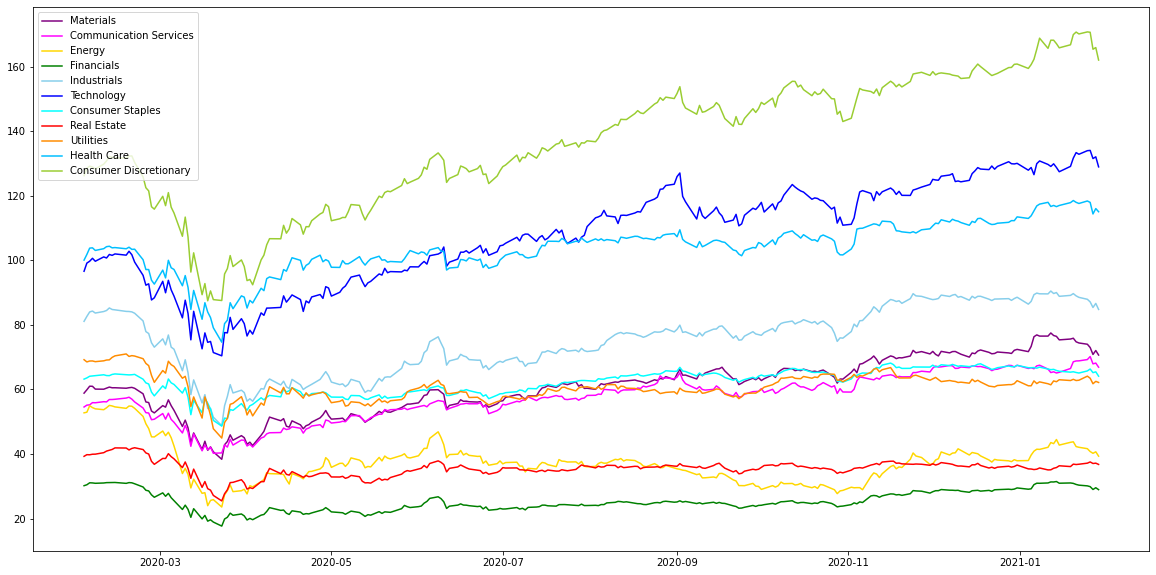

In [26]:
# Create a line plot with the ETFs Close Prices during the whole period 
plt.figure(figsize=(20,10))

plt.plot(copy_c['Date'], copy_c['XLB'], color='purple', label='Materials')
plt.plot(copy_c['Date'], copy_c['XLC'], color='magenta', label = 'Communication Services')
plt.plot(copy_c['Date'], copy_c['XLE'], color='gold', label='Energy')
plt.plot(copy_c['Date'], copy_c['XLF'], color='green', label='Financials')
plt.plot(copy_c['Date'], copy_c['XLI'], color='skyblue', label='Industrials')
plt.plot(copy_c['Date'], copy_c['XLK'], color='blue', label='Technology')
plt.plot(copy_c['Date'], copy_c['XLP'], color='aqua', label='Consumer Staples')
plt.plot(copy_c['Date'], copy_c['XLRE'], color='red', label='Real Estate')
plt.plot(copy_c['Date'], copy_c['XLU'], color='darkorange', label='Utilities')
plt.plot(copy_c['Date'], copy_c['XLV'], color='deepskyblue', label='Health Care')
plt.plot(copy_c['Date'], copy_c['XLY'], color='yellowgreen', label='Consumer Discretionary')



plt.legend()
plt.xticks(months_labels, rotation=45)

plt.show()

In [27]:
# The index of our first Dataframe is date which we can use in our next step as our merging value
test = pd.DataFrame(index= [etf_data.index])
test

""
Date
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
...
2021-01-25
2021-01-26
2021-01-27


In [28]:
# Earning Anlysis - Calculate the daily change between the close and open price 
daily_earnings = close.pct_change()
daily_earnings

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.017675,0.010449,0.003603,0.009612,0.018870,0.026193,0.006015,0.012987,-0.009971,0.017593,0.018224
2020-02-05,0.018537,0.001633,0.037597,0.020026,0.016705,0.005851,0.008024,-0.000754,0.004087,0.019253,0.005058
2020-02-06,-0.000492,0.012498,-0.010197,-0.001287,0.003215,0.009127,0.001717,0.004277,0.000291,0.000867,-0.002245
2020-02-07,-0.014272,-0.000716,-0.006990,-0.003545,-0.007240,-0.009144,0.001247,0.000501,-0.003197,-0.007800,-0.004345
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.005243,0.005811,-0.010221,-0.007251,-0.006779,0.008357,0.009989,0.008963,0.020051,0.006548,0.003704
2021-01-26,-0.013786,0.013576,-0.021374,-0.007968,-0.009214,0.000672,0.008977,0.010229,-0.009984,-0.003717,-0.000644
2021-01-27,-0.029464,-0.032345,-0.013497,-0.029451,-0.019862,-0.018876,-0.016890,-0.012790,-0.026946,-0.030360,-0.030829


In [29]:
for i, v in enumerate(daily_earnings):
    print(i,v)

0 XLB
1 XLC
2 XLE
3 XLF
4 XLI
5 XLK
6 XLP
7 XLRE
8 XLU
9 XLV
10 XLY


In [30]:
daily_earnings = daily_earnings[ETF]
daily_earnings

,XLE,XLU,XLK,XLB,XLP,XLY,XLI,XLC,XLV,XLF,XLRE
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.003603,-0.009971,0.026193,0.017675,0.006015,0.018224,0.018870,0.010449,0.017593,0.009612,0.012987
2020-02-05,0.037597,0.004087,0.005851,0.018537,0.008024,0.005058,0.016705,0.001633,0.019253,0.020026,-0.000754
2020-02-06,-0.010197,0.000291,0.009127,-0.000492,0.001717,-0.002245,0.003215,0.012498,0.000867,-0.001287,0.004277
2020-02-07,-0.006990,-0.003197,-0.009144,-0.014272,0.001247,-0.004345,-0.007240,-0.000716,-0.007800,-0.003545,0.000501
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.005811,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,0.013576,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.032345,-0.030360,-0.029451,-0.012790


In [31]:
# Rename the columns with the corresponding ETF name
daily_earnings.columns = ['Energy', 'Utilities', 'Technology', 'Materials','Consumer Staples', 
                          'Consumer Discretionary', 'Industrials', 'Communication Serv', 'Health Care',
                         'Financials','Real Estate']
daily_earnings

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.003603,-0.009971,0.026193,0.017675,0.006015,0.018224,0.018870,0.010449,0.017593,0.009612,0.012987
2020-02-05,0.037597,0.004087,0.005851,0.018537,0.008024,0.005058,0.016705,0.001633,0.019253,0.020026,-0.000754
2020-02-06,-0.010197,0.000291,0.009127,-0.000492,0.001717,-0.002245,0.003215,0.012498,0.000867,-0.001287,0.004277
2020-02-07,-0.006990,-0.003197,-0.009144,-0.014272,0.001247,-0.004345,-0.007240,-0.000716,-0.007800,-0.003545,0.000501
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.005811,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,0.013576,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.032345,-0.030360,-0.029451,-0.012790


In [32]:
# Remove Telcom Industry Column
daily_earnings= daily_earnings.drop(['Communication Serv'], axis=1)

In [33]:
# Use reset index method in order to convert Data Index into a column
daily_earnings = daily_earnings.reset_index()

In [34]:
# Verify the change was made
daily_earnings.columns

Index(['Date', 'Energy', 'Utilities', 'Technology', 'Materials',
       'Consumer Staples', 'Consumer Discretionary', 'Industrials',
       'Health Care', 'Financials', 'Real Estate'],
      dtype='object')

In [35]:
import seaborn as sns

In [36]:
# Display the earnging dataframe
daily_earnings.corr() # Meter en seaborn/cluster map

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Energy,1.000000,0.581973,0.613482,0.819634,0.589180,0.724166,0.838036,0.651374,0.856196,0.687938
Utilities,0.581973,1.000000,0.712635,0.790895,0.866919,0.743903,0.793279,0.817641,0.764599,0.872076
Technology,0.613482,0.712635,1.000000,0.794026,0.816331,0.907344,0.783064,0.860159,0.759408,0.783301
Materials,0.819634,0.790895,0.794026,1.000000,0.798699,0.879807,0.940704,0.826743,0.914260,0.845416
Consumer Staples,0.589180,0.866919,0.816331,0.798699,1.000000,0.795391,0.805524,0.870758,0.772555,0.830500
Consumer Discretionary,0.724166,0.743903,0.907344,0.879807,0.795391,1.000000,0.885754,0.831850,0.851266,0.844971
Industrials,0.838036,0.793279,0.783064,0.940704,0.805524,0.885754,1.000000,0.826453,0.940924,0.868569
Health Care,0.651374,0.817641,0.860159,0.826743,0.870758,0.831850,0.826453,1.000000,0.795735,0.828758
Financials,0.856196,0.764599,0.759408,0.914260,0.772555,0.851266,0.940924,0.795735,1.000000,0.850886
Real Estate,0.687938,0.872076,0.783301,0.845416,0.830500,0.844971,0.868569,0.828758,0.850886,1.000000


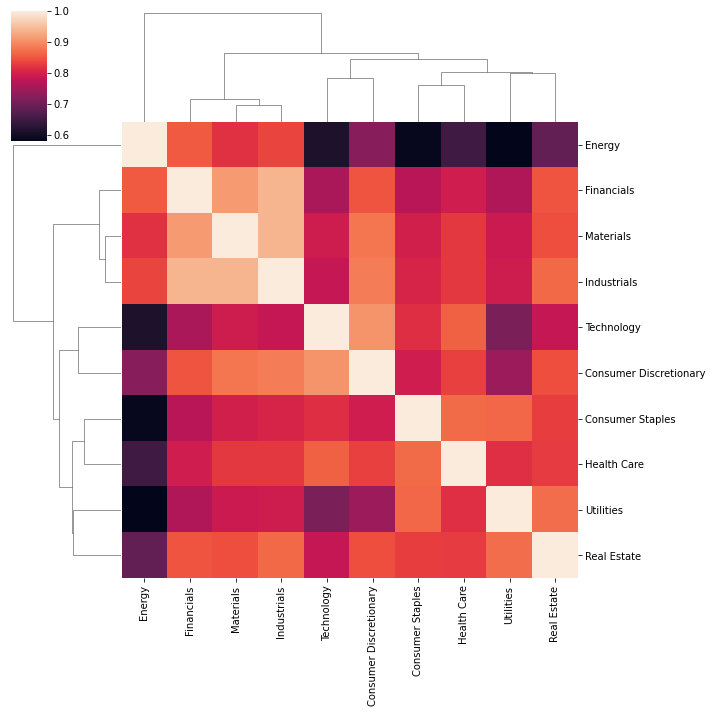

In [37]:
g = sns.clustermap(daily_earnings.corr())

ConversionError: Failed to convert value(s) to axis units: ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01']

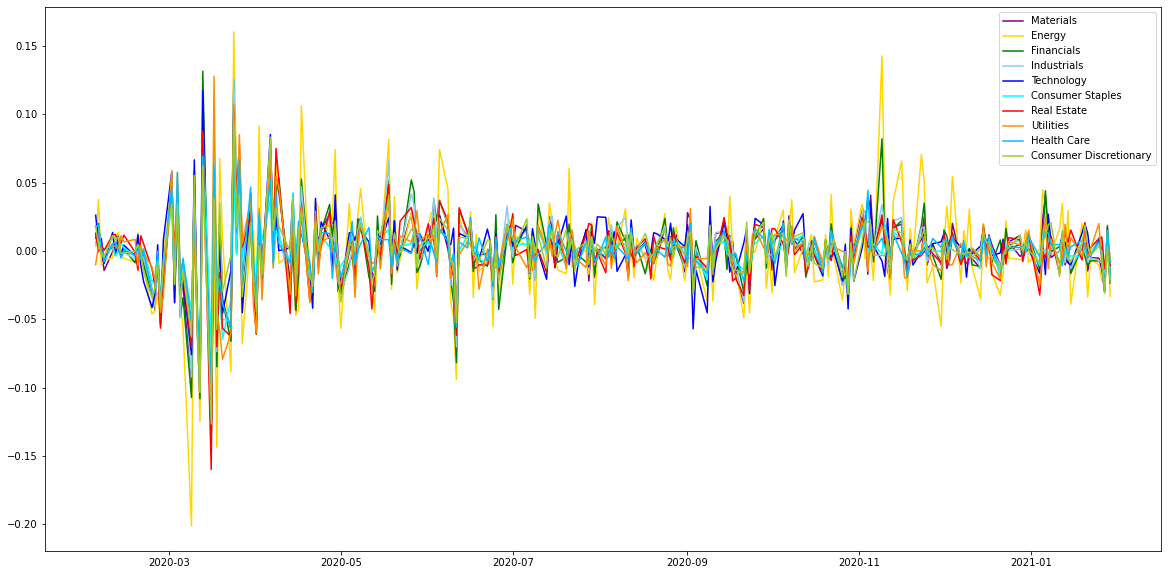

In [38]:
# Plot the daily changes/earnings by industry
plt.figure(figsize=(20,10))

plt.plot(daily_earnings['Date'], daily_earnings['Materials'], color='purple', label='Materials')
plt.plot(daily_earnings['Date'], daily_earnings['Energy'], color='gold', label='Energy')
plt.plot(daily_earnings['Date'], daily_earnings['Financials'], color='green', label='Financials')
plt.plot(daily_earnings['Date'], daily_earnings['Industrials'], color='skyblue', label='Industrials')
plt.plot(daily_earnings['Date'], daily_earnings['Technology'], color='blue', label='Technology')
plt.plot(daily_earnings['Date'], daily_earnings['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(daily_earnings['Date'], daily_earnings['Real Estate'], color='red', label='Real Estate')
plt.plot(daily_earnings['Date'], daily_earnings['Utilities'], color='darkorange', label='Utilities')
plt.plot(daily_earnings['Date'], daily_earnings['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(daily_earnings['Date'], daily_earnings['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')


plt.legend()
plt.xticks(months_labels, rotation=45)

plt.show()

# Data Analysis Part II - Feb 2015 to Feb 2021
Gather all the information related to Select Sector SPDR ETFs which are the Unique Exchange Traded Funds (ETFs) that divide the S&P into eleven index funds traded throughout the day on NYSE Arca

In [39]:
# Create a list with the ETFs names of the SPDR
ETF = 'XLE XLU XLK XLB XLP XLY XLI XLC XLV XLF XLRE'.split()
ETF

['XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLC', 'XLV', 'XLF', 'XLRE']

In [40]:
# Use yahoo finance API function .download to return a dataframe with the information of the ETFs daily performance
full_df = yf.download(tickers= ETF, start='2015-01-31', end='2021-02-01') # define the period (COVID)

[*********************100%***********************]  11 of 11 completed


In [41]:
# Display the pre_covid dataframe
full_df.head()

Adj Close                                                  \
                  XLB XLC        XLE        XLF        XLI        XLK   
Date                                                                    
2015-02-02  42.597622 NaN  60.823181  16.861570  49.024681  36.779423   
2015-02-03  43.535961 NaN  62.487103  17.142832  49.821396  37.199127   
2015-02-04  43.252689 NaN  61.455940  17.099562  49.440746  37.272121   
2015-02-05  44.297268 NaN  62.338669  17.272652  49.865669  37.618835   
2015-02-06  44.191044 NaN  62.354282  17.409681  49.750580  37.500225   

                                                  ... Volume            \
                  XLP XLRE        XLU        XLV  ...    XLC       XLE   
Date                                              ...                    
2015-02-02  41.335491  NaN  39.613911  62.988140  ...    NaN  35465700   
2015-02-03  41.701294  NaN  39.760857  63.413132  ...    NaN  47027900   
2015-02-04  41.718315  NaN  39.279236  62.617397  ...    NaN  41132200   
2015-02-05  41.930984  NaN  39.638420  63.675339  ...    NaN  31786200   
2015-02-06  41.743835  NaN  38.005856  63.096642  ...    NaN  26134600   

                                                                             \
                 XLF       XLI       XLK       XLP XLRE       XLU       XLV   
Date                                                                          
2015-02-02  62984977  19465900  15623600  14354100  NaN  22399300  18042300   
2015-02-03  66155787  18896200   9883700   6279600  NaN  16159500  17432800   
2015-02-04  37523958  10600100   5889400   7901300  NaN  13859000  15184800   
2015-02-05  30264135   9193900   5091800   8079500  NaN  13165300  10801400   
2015-02-06  83237512   6192200   4790300   6304100  NaN  32184200  11886100   

                      
                 XLY  
Date                  
2015-02-02  20849400  
2015-02-03   5614400  
2015-02-04   9166000  
2015-02-05   5077500  
2015-02-06   4648300  

[5 rows x 66 columns]

In [42]:
# Select the pre_covid close price column
full_df_close = full_df['Close']
full_df_close = full_df_close[ETF]
full_df_close.columns = ['Energy', 'Utilities', 'Technology', 'Materials','Consumer Staples', 
                          'Consumer Discretionary', 'Industrials', 'Communication Serv', 'Health Care',
                         'Financials','Real Estate']
full_df_close

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,69.239998,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,70.180000,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,67.910004,114.339996,29.000000,37.049999


In [43]:
full_df_close.columns

Index(['Energy', 'Utilities', 'Technology', 'Materials', 'Consumer Staples',
       'Consumer Discretionary', 'Industrials', 'Communication Serv',
       'Health Care', 'Financials', 'Real Estate'],
      dtype='object')

In [44]:
# check for values that equal 0
zero_df2 = full_df_close[full_df_close[['Energy', 'Utilities', 'Technology', 'Materials', 'Consumer Staples',
       'Consumer Discretionary', 'Industrials', 'Communication Serv',
       'Health Care', 'Financials', 'Real Estate']] == 0].sum()
zero_df2

Energy                    0.0
Utilities                 0.0
Technology                0.0
Materials                 0.0
Consumer Staples          0.0
Consumer Discretionary    0.0
Industrials               0.0
Communication Serv        0.0
Health Care               0.0
Financials                0.0
Real Estate               0.0
dtype: float64

In [45]:
# Check for null values
full_df_close.isna().sum()

Energy                      0
Utilities                   0
Technology                  0
Materials                   0
Consumer Staples            0
Consumer Discretionary      0
Industrials                 0
Communication Serv        851
Health Care                 0
Financials                  0
Real Estate               173
dtype: int64

In [46]:
# Zoom in into those null values
full_df_close[full_df_close.isna().any(axis=1)]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-12,76.709999,49.150002,72.110001,61.000000,51.349998,110.889999,76.510002,NaN,85.150002,27.950001,32.230000
2018-06-13,76.419998,49.020000,71.739998,60.340000,51.189999,111.059998,75.900002,NaN,85.169998,27.850000,31.510000
2018-06-14,76.309998,49.630001,72.250000,60.430000,51.279999,112.220001,75.610001,NaN,85.610001,27.590000,31.809999


In [47]:
# Inspect the XLC ETF null values
full_df_close[full_df_close['Communication Serv'].isna()]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-12,76.709999,49.150002,72.110001,61.000000,51.349998,110.889999,76.510002,NaN,85.150002,27.950001,32.230000
2018-06-13,76.419998,49.020000,71.739998,60.340000,51.189999,111.059998,75.900002,NaN,85.169998,27.850000,31.510000
2018-06-14,76.309998,49.630001,72.250000,60.430000,51.279999,112.220001,75.610001,NaN,85.610001,27.590000,31.809999


In [48]:
# check those values of XLC that are not null
# creating bool series False for NaN values
bool_series = pd.notnull(full_df_close["Communication Serv"])
 
# displayed data only with team = NaN
full_df_close[bool_series]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2018-06-19,74.739998,50.189999,71.430000,58.490002,51.060001,111.779999,73.230003,49.959999,84.860001,27.350000,31.500000
2018-06-20,75.070000,50.230000,71.580002,58.299999,51.110001,112.309998,73.279999,50.580002,85.040001,27.280001,31.840000
2018-06-21,73.680000,50.400002,71.029999,57.680000,51.209999,111.510002,72.360001,50.270000,84.550003,27.200001,32.029999
2018-06-22,75.150002,50.750000,70.800003,58.520000,51.630001,111.320000,72.610001,50.490002,84.930000,27.070000,32.310001
2018-06-25,73.639999,51.590000,69.330002,57.610001,51.889999,108.900002,71.690002,49.450001,84.150002,26.780001,32.230000
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,69.239998,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,70.180000,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,67.910004,114.339996,29.000000,37.049999


In [49]:
# Since there are too many null values in XLC and XLRE ETFs we are going to drop these columns
full_df_close = full_df_close.drop(['Communication Serv'], axis=1)

In [50]:
# Check the dataframe without XLC(Telecom) & XLRE(real estate)
full_daily_earnings = full_df_close.copy()
full_df_close

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Date,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,114.339996,29.000000,37.049999


In [51]:
# Create a copy of the dataframe to format the date column and pass them as labels to our plot
full_df_close = full_df_close.reset_index()
full_df_close

,Date,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
0,2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,69.660004,18.992689,NaN
1,2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,70.129997,19.309504,NaN
2,2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,69.250000,19.260763,NaN
3,2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,70.419998,19.455727,NaN
4,2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1505,2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,118.360001,30.120001,37.150002
1506,2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,117.919998,29.879999,37.529999
1507,2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,114.339996,29.000000,37.049999
1508,2021-01-28,40.669998,62.490002,132.039993,72.040001,65.440002,165.880005,86.639999,116.010002,29.540001,37.150002


In [52]:
full_daily_earnings = full_daily_earnings.pct_change()
full_daily_earnings

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Date,,,,,,,,,,
2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-03,0.027357,0.003709,0.011412,0.022028,0.008850,0.021240,0.016251,0.006747,0.016681,NaN
2015-02-04,-0.016502,-0.012113,0.001962,-0.006507,0.000408,0.006656,-0.007640,-0.012548,-0.002524,NaN
2015-02-05,0.014364,0.009144,0.009302,0.024151,0.005098,0.006198,0.008595,0.016895,0.010122,NaN
2015-02-06,0.000251,-0.041186,-0.003153,-0.002398,-0.004463,-0.001506,-0.002308,-0.009088,0.007933,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.030360,-0.029451,-0.012790


In [53]:
full_daily_earnings = full_daily_earnings.reset_index()
full_daily_earnings

,Date,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
0,2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-03,0.027357,0.003709,0.011412,0.022028,0.008850,0.021240,0.016251,0.006747,0.016681,NaN
2,2015-02-04,-0.016502,-0.012113,0.001962,-0.006507,0.000408,0.006656,-0.007640,-0.012548,-0.002524,NaN
3,2015-02-05,0.014364,0.009144,0.009302,0.024151,0.005098,0.006198,0.008595,0.016895,0.010122,NaN
4,2015-02-06,0.000251,-0.041186,-0.003153,-0.002398,-0.004463,-0.001506,-0.002308,-0.009088,0.007933,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1505,2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.006548,-0.007251,0.008963
1506,2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,-0.003717,-0.007968,0.010229
1507,2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.030360,-0.029451,-0.012790
1508,2021-01-28,0.011691,0.011984,0.004106,0.017227,0.003835,0.003145,0.014876,0.014606,0.018621,0.002699


In [54]:
full_daily_earnings.corr() # Meter en seaborn/cluster map

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Energy,1.000000,0.424814,0.584052,0.761067,0.505806,0.655492,0.766269,0.573224,0.760513,0.537601
Utilities,0.424814,1.000000,0.509563,0.541868,0.742009,0.524567,0.569958,0.567881,0.511886,0.777074
Technology,0.584052,0.509563,1.000000,0.753015,0.699862,0.878583,0.781340,0.786251,0.732173,0.627606
Materials,0.761067,0.541868,0.753015,1.000000,0.676611,0.804964,0.893429,0.726027,0.833501,0.655835
Consumer Staples,0.505806,0.742009,0.699862,0.676611,1.000000,0.710599,0.709945,0.727727,0.657684,0.736430
Consumer Discretionary,0.655492,0.524567,0.878583,0.804964,0.710599,1.000000,0.846627,0.768478,0.801427,0.684279
Industrials,0.766269,0.569958,0.781340,0.893429,0.709945,0.846627,1.000000,0.757394,0.888791,0.689298
Health Care,0.573224,0.567881,0.786251,0.726027,0.727727,0.768478,0.757394,1.000000,0.725386,0.648103
Financials,0.760513,0.511886,0.732173,0.833501,0.657684,0.801427,0.888791,0.725386,1.000000,0.651314
Real Estate,0.537601,0.777074,0.627606,0.655835,0.736430,0.684279,0.689298,0.648103,0.651314,1.000000


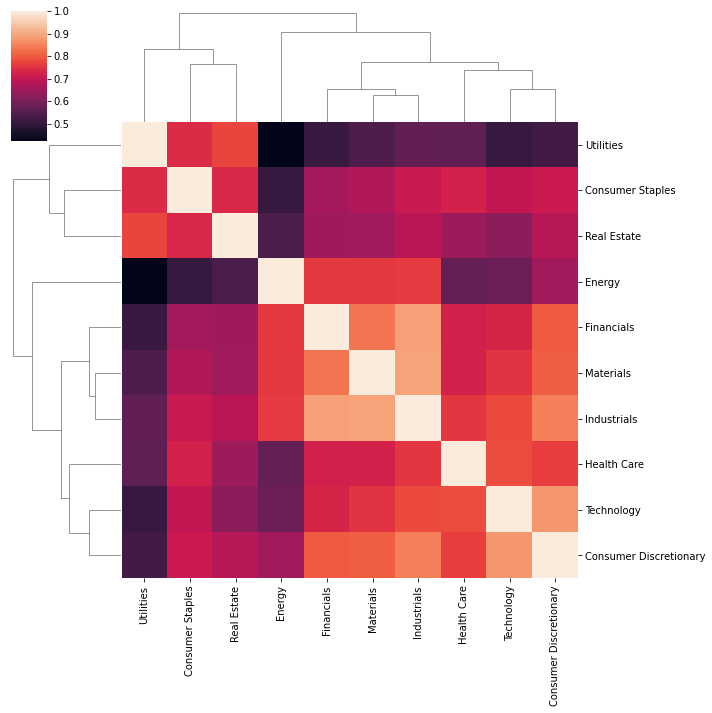

In [55]:
g = sns.clustermap(full_daily_earnings.corr())

In [56]:
# create a new column called month_year with data format: Year-Month by using the 'Date' column 
full_df_close['Year_Month'] = full_df_close['Date'].apply(lambda x: x.strftime('%Y-%m'))
months2 = full_df_close['Year_Month'].unique()
months_labels2 = months2.tolist() #take the unique year-month values an save it as a list

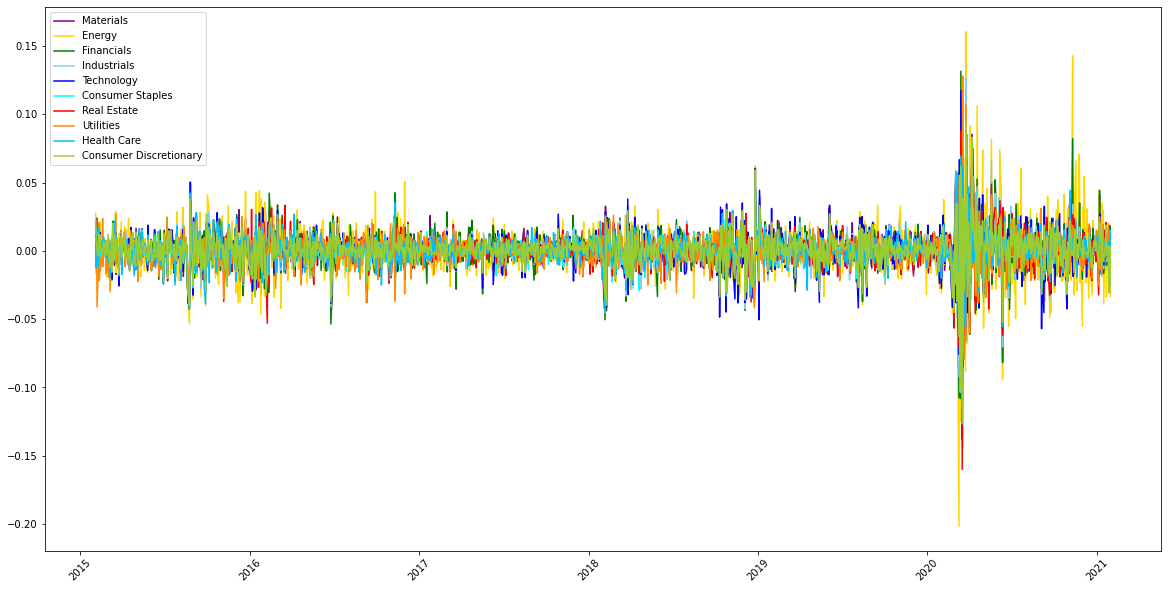

In [57]:
# Plot the daily changes/earnings by industry
plt.figure(figsize=(20,10))

plt.plot(full_daily_earnings['Date'], full_daily_earnings['Materials'], color='purple', label='Materials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Energy'], color='gold', label='Energy')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Financials'], color='green', label='Financials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Industrials'], color='skyblue', label='Industrials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Technology'], color='blue', label='Technology')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Real Estate'], color='red', label='Real Estate')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Utilities'], color='darkorange', label='Utilities')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')


plt.legend()
plt.xticks( rotation=45)

plt.show()

ConversionError: Failed to convert value(s) to axis units: ['2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01']

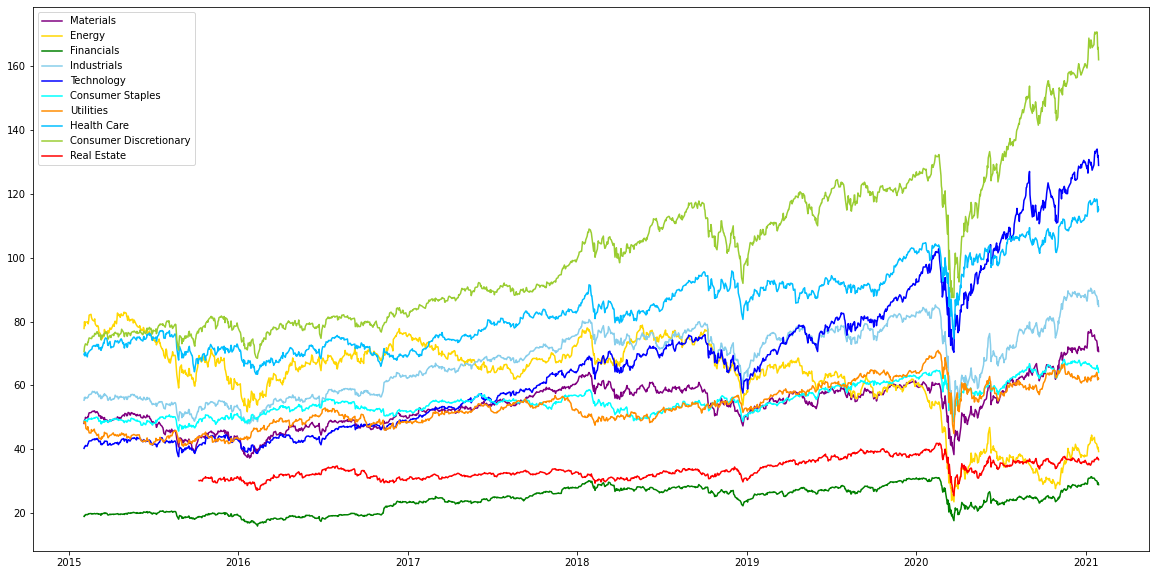

In [58]:
# Create a line plot with the ETFs Close Prices during the whole period 
plt.figure(figsize=(20,10))

plt.plot(full_df_close['Date'], full_df_close['Materials'], color='purple', label='Materials')
plt.plot(full_df_close['Date'], full_df_close['Energy'], color='gold', label='Energy')
plt.plot(full_df_close['Date'], full_df_close['Financials'], color='green', label='Financials')
plt.plot(full_df_close['Date'], full_df_close['Industrials'], color='skyblue', label='Industrials')
plt.plot(full_df_close['Date'], full_df_close['Technology'], color='blue', label='Technology')
plt.plot(full_df_close['Date'], full_df_close['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(full_df_close['Date'], full_df_close['Utilities'], color='darkorange', label='Utilities')
plt.plot(full_df_close['Date'], full_df_close['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(full_df_close['Date'], full_df_close['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')
plt.plot(full_df_close['Date'], full_df_close['Real Estate'], color='red', label='Real Estate')


plt.legend()
plt.xticks(months_labels2, rotation=45)

plt.show()

ConversionError: Failed to convert value(s) to axis units: ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01']

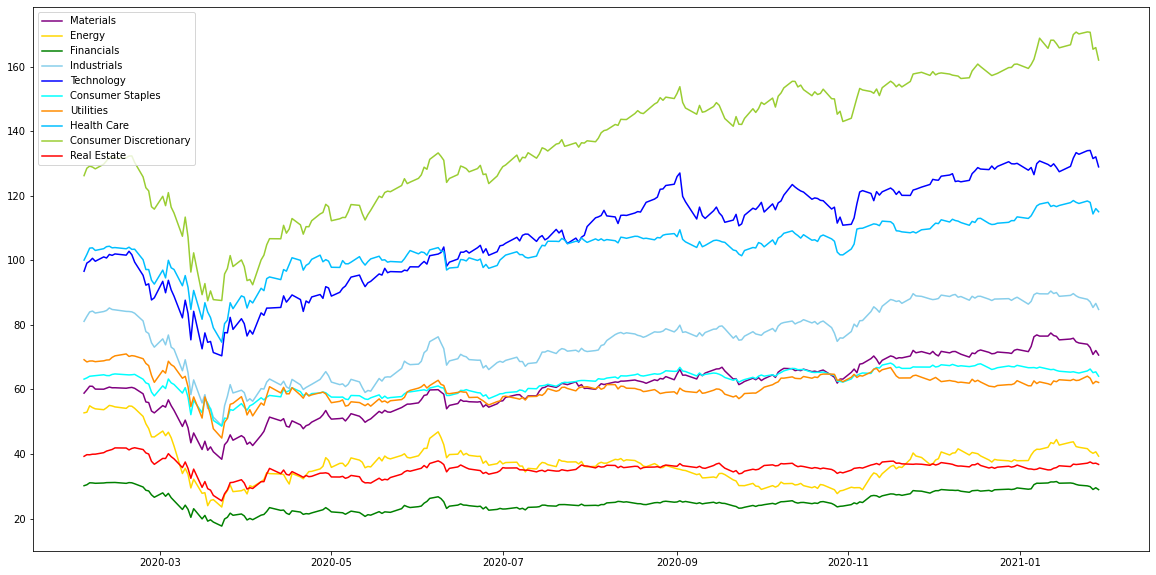

In [59]:
# Create a line plot with the ETFs Close Prices during the whole period 
plt.figure(figsize=(20,10))

plt.plot(copy_c['Date'], copy_c['XLB'], color='purple', label='Materials')
plt.plot(copy_c['Date'], copy_c['XLE'], color='gold', label='Energy')
plt.plot(copy_c['Date'], copy_c['XLF'], color='green', label='Financials')
plt.plot(copy_c['Date'], copy_c['XLI'], color='skyblue', label='Industrials')
plt.plot(copy_c['Date'], copy_c['XLK'], color='blue', label='Technology')
plt.plot(copy_c['Date'], copy_c['XLP'], color='aqua', label='Consumer Staples')
plt.plot(copy_c['Date'], copy_c['XLU'], color='darkorange', label='Utilities')
plt.plot(copy_c['Date'], copy_c['XLV'], color='deepskyblue', label='Health Care')
plt.plot(copy_c['Date'], copy_c['XLY'], color='yellowgreen', label='Consumer Discretionary')
plt.plot(copy_c['Date'], copy_c['XLRE'], color='red', label='Real Estate')



plt.legend()
plt.xticks(months_labels, rotation=45)

plt.show()

# US Employment

In [60]:
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ["CEU1000000001", "CEU2000000001", "CEU3100000001", "CEU3200000001", "CEU4100000001", "CEU4200000001", "CEU4300000001", "CEU5000000001", "CEU5500000001", "CEU6000000001", "CEU6500000001", "CEU7000000001"], "startyear":"2011", "endyear":"2021" ,"registrationkey":emp_key })
p = requests.post(url, data=data, headers=headers).json()

In [61]:
mining = []
construction = []
durable_goods = []
non_durable_goods = []
retail = []
transportation = []
information = []
financial_activities = []
professional_and_business = []
education_and_health = []
leisure_and_hospitality = []

dates = []
#months= []
s_mining = p['Results']['series'][0]['data']
s_construction = p['Results']['series'][1]['data']
s_durable_goods = p['Results']['series'][2]['data']
s_non_durable_goods = p['Results']['series'][3]['data']
s_retail = p['Results']['series'][5]['data']
s_transportation = p['Results']['series'][6]['data']
s_information = p['Results']['series'][7]['data']
s_financial = p['Results']['series'][8]['data']
s_profesional = p['Results']['series'][9]['data']
s_education_health = p['Results']['series'][10]['data']
s_hospitality = p['Results']['series'][11]['data']

for x in range(0,len(s_mining)):
    value_mining = s_mining[x]['value']
    value_construction = s_construction[x]['value']
    value_durable_goods = s_durable_goods[x]['value']
    value_non_durable_goods = s_non_durable_goods[x]['value']
    value_retail = s_retail[x]['value']
    value_transportation = s_transportation[x]['value']
    value_information = s_information[x]['value']
    value_financial = s_financial[x]['value']
    value_professional = s_profesional[x]['value']
    value_edu_health = s_education_health[x]['value']
    value_hospitality = s_hospitality[x]['value']
    
    
    period = s_mining[x]['period']
    date = s_mining[x]['year'] + '-' + period[1:]
    
    mining.append(value_mining)
    construction.append(value_construction)
    durable_goods.append(value_durable_goods)
    non_durable_goods.append(value_non_durable_goods)
    retail.append(value_retail)
    transportation.append(value_transportation)
    information.append(value_information)
    financial_activities.append(value_financial)
    professional_and_business.append(value_professional)
    education_and_health.append(value_edu_health)
    leisure_and_hospitality.append(value_hospitality)
    
    
    dates.append(date)
    #months.append(period[1:])

In [62]:
employees = pd.DataFrame({'Date': dates, 'Mining': mining, 'Construction': construction,
                         'Durable_goods': durable_goods, 'Non_durable_goods': non_durable_goods, 'Retail': retail,
                         'Transportation': transportation, 'Information': information, 'Financial_activities': financial_activities,
                         'Professional_and_business_activities': professional_and_business, 'Education_and_health': education_and_health,
                         'Leisure_and_hospitality': leisure_and_hospitality})
employees = employees.sort_values('Date', ascending=True)

In [63]:
employees.dtypes

Date                                    object
Mining                                  object
Construction                            object
Durable_goods                           object
Non_durable_goods                       object
Retail                                  object
Transportation                          object
Information                             object
Financial_activities                    object
Professional_and_business_activities    object
Education_and_health                    object
Leisure_and_hospitality                 object
dtype: object

In [64]:
employees.columns

Index(['Date', 'Mining', 'Construction', 'Durable_goods', 'Non_durable_goods',
       'Retail', 'Transportation', 'Information', 'Financial_activities',
       'Professional_and_business_activities', 'Education_and_health',
       'Leisure_and_hospitality'],
      dtype='object')

In [65]:
employees['Mining'] = employees['Mining'].astype('float')
employees['Construction'] = employees['Construction'].astype('float')
employees['Durable_goods'] = employees['Durable_goods'].astype('float')
employees['Non_durable_goods'] = employees['Non_durable_goods'].astype('float')
employees['Retail'] = employees['Retail'].astype('float')
employees['Transportation'] = employees['Transportation'].astype('float')
employees['Information'] = employees['Information'].astype('float')
employees['Financial_activities'] = employees['Financial_activities'].astype('float')
employees['Professional_and_business_activities'] = employees['Professional_and_business_activities'].astype('float')
employees['Education_and_health'] = employees['Education_and_health'].astype('float')
employees['Leisure_and_hospitality'] = employees['Leisure_and_hospitality'].astype('float')


employees.dtypes

Date                                     object
Mining                                  float64
Construction                            float64
Durable_goods                           float64
Non_durable_goods                       float64
Retail                                  float64
Transportation                          float64
Information                             float64
Financial_activities                    float64
Professional_and_business_activities    float64
Education_and_health                    float64
Leisure_and_hospitality                 float64
dtype: object

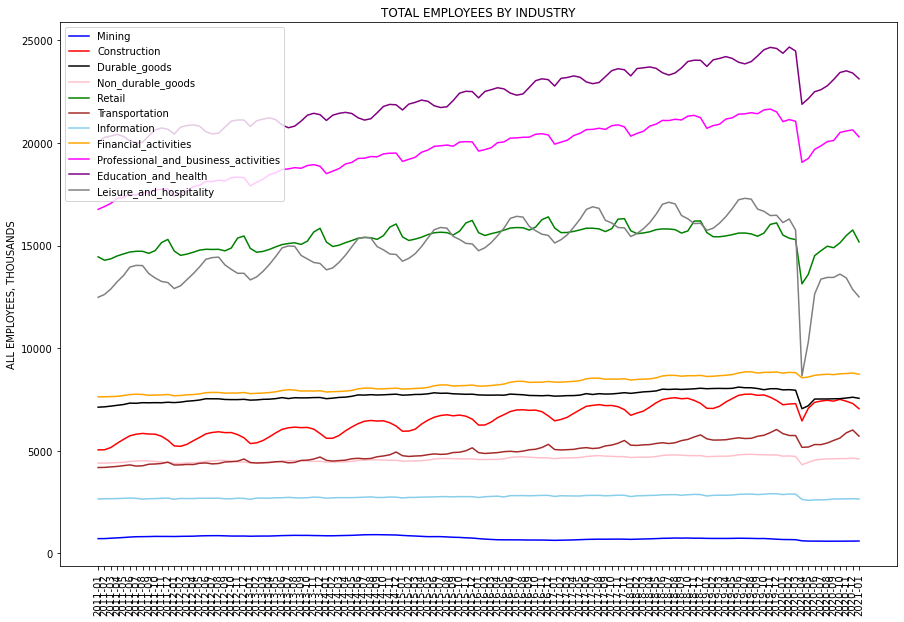

In [66]:
plt.figure(figsize=(15,10))
plt.plot(employees['Date'], employees['Mining'], color='blue', label='Mining')
plt.plot(employees['Date'], employees['Construction'], color='red', label='Construction')
plt.plot(employees['Date'], employees['Durable_goods'], color='black', label='Durable_goods')
plt.plot(employees['Date'], employees['Non_durable_goods'], color='pink', label='Non_durable_goods')
plt.plot(employees['Date'], employees['Retail'], color='green', label='Retail')
plt.plot(employees['Date'], employees['Transportation'], color='brown', label='Transportation')
plt.plot(employees['Date'], employees['Information'], color='skyblue', label='Information')
plt.plot(employees['Date'], employees['Financial_activities'], color='orange', label='Financial_activities')
plt.plot(employees['Date'], employees['Professional_and_business_activities'], color='magenta', label='Professional_and_business_activities')
plt.plot(employees['Date'], employees['Education_and_health'], color='purple', label='Education_and_health')
plt.plot(employees['Date'], employees['Leisure_and_hospitality'], color='gray', label='Leisure_and_hospitality')
plt.xticks(rotation=90)
plt.title('TOTAL EMPLOYEES BY INDUSTRY')
plt.ylabel('ALL EMPLOYEES, THOUSANDS')
plt.legend(loc='upper left')

In [67]:
employees.to_csv("un201119.csv", index=False, header=True)

In [68]:
employees.describe()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
count,121.000000,121.000000,121.00000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,760.586777,6543.586777,7673.85124,4592.380165,15351.186777,4957.832231,2752.702479,8231.363636,19592.429752,22257.396694,14894.719008
std,92.141166,740.655382,235.38177,127.059911,551.302388,496.620734,78.980551,381.024234,1274.856180,1304.867027,1442.641826
min,595.000000,5046.000000,7049.00000,4320.000000,13131.500000,4184.400000,2585.000000,7629.000000,16762.000000,19998.000000,8648.000000
25%,689.000000,5888.000000,7532.00000,4488.000000,14951.800000,4496.100000,2689.000000,7879.000000,18622.000000,21112.000000,13908.000000
50%,742.000000,6614.000000,7710.00000,4584.000000,15468.000000,4929.700000,2743.000000,8199.000000,19837.000000,22323.000000,14978.000000
75%,847.000000,7201.000000,7798.00000,4709.000000,15718.600000,5353.600000,2819.000000,8593.000000,20646.000000,23401.000000,15930.000000
max,914.000000,7761.000000,8102.00000,4828.000000,16394.300000,6037.400000,2909.000000,8846.000000,21645.000000,24668.000000,17299.000000


In [69]:
# splitting dataframe by row index, las 12 months are COVID
employment_no_covid = employees.iloc[:107,:] 
employment_covid = employees.iloc[108:,:]
employment_covid.head()

,Date,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
12,2020-01,678.0,7243.0,7967.0,4738.0,15508.4,5835.1,2868.0,8783.0,21036.0,24364.0,16117.0
11,2020-02,675.0,7278.0,7978.0,4749.0,15353.9,5745.9,2894.0,8820.0,21134.0,24668.0,16292.0
10,2020-03,669.0,7297.0,7949.0,4723.0,15286.8,5741.7,2888.0,8805.0,21050.0,24471.0,15745.0
9,2020-04,615.0,6452.0,7049.0,4320.0,13131.5,5168.3,2630.0,8555.0,19053.0,21880.0,8648.0
8,2020-05,602.0,7070.0,7195.0,4434.0,13600.0,5181.9,2585.0,8593.0,19238.0,22153.0,10303.0


In [70]:
employment_no_covid_data = employment_no_covid.drop(columns=[ 'Date'])
employment_no_covid_pct_change = employment_no_covid_data.pct_change()
employment_no_covid_pct_change = employment_no_covid_pct_change.iloc[1:]
employment_no_covid_pct_change.head()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
119,0.002774,0.000595,0.002386,0.000227,-0.011496,0.001434,0.003769,0.000131,0.008114,0.012338,0.010980
118,0.024896,0.021588,0.004901,0.002499,0.004677,0.005775,0.001502,0.001442,0.009054,0.003010,0.021167
117,0.021592,0.039938,0.005435,0.002947,0.009736,0.005623,0.002250,0.001440,0.014251,0.004083,0.027327
116,0.025099,0.035794,0.005267,0.002712,0.006881,0.008966,0.004115,0.005227,0.003122,-0.004654,0.022822
115,0.028351,0.030958,0.009651,0.009240,0.006416,0.008255,0.004471,0.005850,0.008531,-0.011075,0.030440


In [71]:
employment_no_covid_pct_change.corr()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
Mining,1.000000,0.519549,0.511071,0.487505,0.199945,0.169557,0.269795,0.449326,0.435911,-0.099664,0.484338
Construction,0.519549,1.000000,0.506886,0.734967,0.380789,0.257167,0.448903,0.635650,0.797232,0.064625,0.804514
Durable_goods,0.511071,0.506886,1.000000,0.646380,0.411359,0.398864,0.441737,0.637865,0.564583,-0.124870,0.651506
Non_durable_goods,0.487505,0.734967,0.646380,1.000000,0.321333,0.305974,0.475130,0.808300,0.616377,-0.197639,0.790030
Retail,0.199945,0.380789,0.411359,0.321333,1.000000,0.727027,0.534533,0.514095,0.637837,0.214904,0.271220
Transportation,0.169557,0.257167,0.398864,0.305974,0.727027,1.000000,0.357784,0.280254,0.541046,0.411024,0.108807
Information,0.269795,0.448903,0.441737,0.475130,0.534533,0.357784,1.000000,0.586153,0.692655,0.342789,0.442931
Financial_activities,0.449326,0.635650,0.637865,0.808300,0.514095,0.280254,0.586153,1.000000,0.634972,-0.257567,0.813774
Professional_and_business_activities,0.435911,0.797232,0.564583,0.616377,0.637837,0.541046,0.692655,0.634972,1.000000,0.425225,0.628218
Education_and_health,-0.099664,0.064625,-0.124870,-0.197639,0.214904,0.411024,0.342789,-0.257567,0.425225,1.000000,-0.279472


Correlation for Industries on NO COVID Months


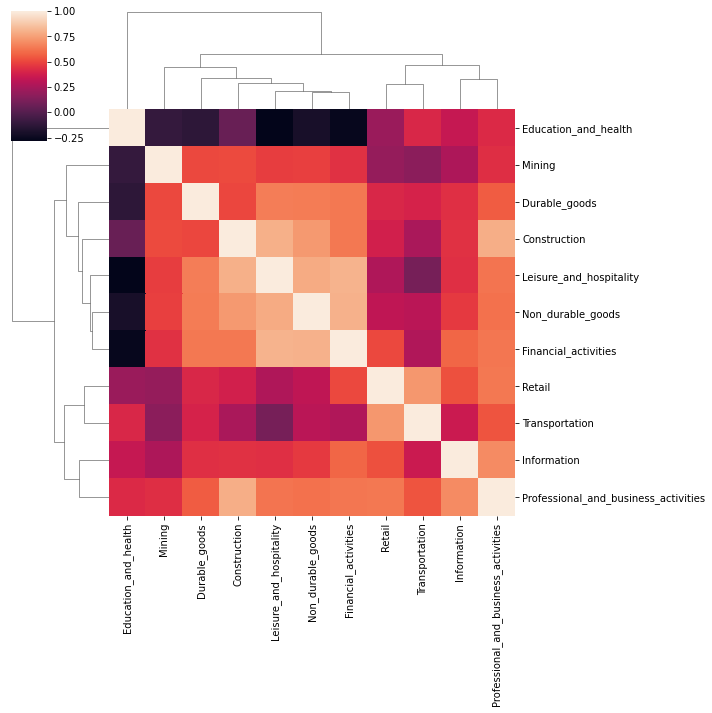

In [72]:
g = sns.clustermap(employment_no_covid_pct_change.corr())
print("Correlation for Industries on NO COVID Months")

In [74]:
employment_covid_data = employment_covid.drop(columns=[ 'Date'])
employment_covid_pct_change = employment_covid_data.pct_change()
employment_covid_pct_change = employment_covid_pct_change.iloc[1:]
employment_covid_pct_change.head()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
11,-0.004425,0.004832,0.001381,0.002322,-0.009962,-0.015287,0.009066,0.004213,0.004659,0.012477,0.010858
10,-0.008889,0.002611,-0.003635,-0.005475,-0.004370,-0.000731,-0.002073,-0.001701,-0.003975,-0.007986,-0.033575
9,-0.080717,-0.115801,-0.113222,-0.085327,-0.140991,-0.099866,-0.089335,-0.028393,-0.094869,-0.105880,-0.450746
8,-0.021138,0.095784,0.020712,0.026389,0.035678,0.002631,-0.017110,0.004442,0.009710,0.012477,0.191374
7,-0.003322,0.040877,0.045170,0.025936,0.066426,0.023640,0.008124,0.009543,0.023131,0.015258,0.226536


In [75]:
employment_covid_pct_change.corr()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
Mining,1.000000,0.521691,0.839817,0.805600,0.764203,0.755936,0.955799,0.808753,0.863919,0.885024,0.715727
Construction,0.521691,1.000000,0.852951,0.910002,0.861205,0.649931,0.626028,0.845249,0.827700,0.819361,0.930467
Durable_goods,0.839817,0.852951,1.000000,0.982954,0.964094,0.811230,0.891386,0.955404,0.956113,0.943087,0.965545
Non_durable_goods,0.805600,0.910002,0.982954,1.000000,0.965070,0.801288,0.865768,0.966494,0.964124,0.953504,0.975111
Retail,0.764203,0.861205,0.964094,0.965070,1.000000,0.887955,0.834932,0.966682,0.956177,0.909763,0.937259
Transportation,0.755936,0.649931,0.811230,0.801288,0.887955,1.000000,0.821723,0.843045,0.870676,0.837721,0.711800
Information,0.955799,0.626028,0.891386,0.865768,0.834932,0.821723,1.000000,0.889197,0.929331,0.947459,0.784204
Financial_activities,0.808753,0.845249,0.955404,0.966494,0.966682,0.843045,0.889197,1.000000,0.982624,0.951201,0.922139
Professional_and_business_activities,0.863919,0.827700,0.956113,0.964124,0.956177,0.870676,0.929331,0.982624,1.000000,0.982370,0.913401
Education_and_health,0.885024,0.819361,0.943087,0.953504,0.909763,0.837721,0.947459,0.951201,0.982370,1.000000,0.902651


Correlation for Industries on COVID Months


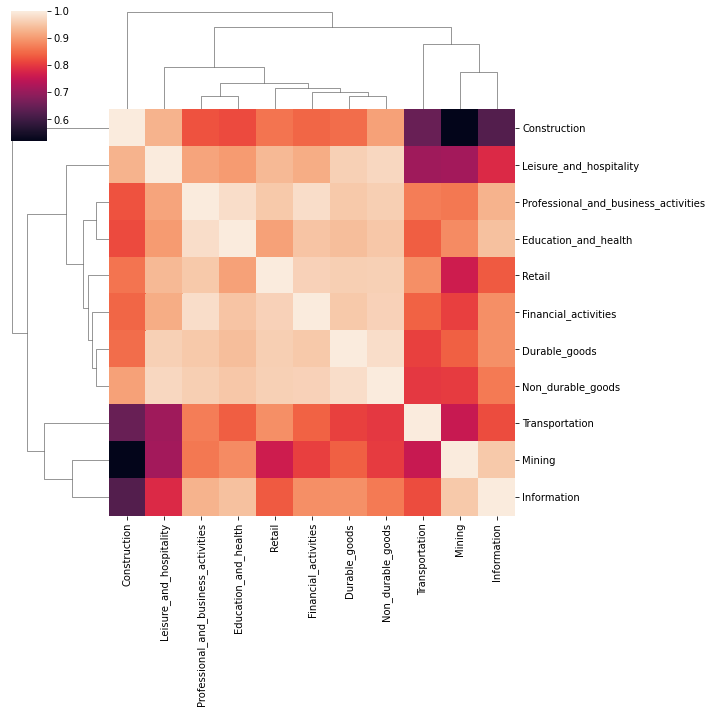

In [76]:
g = sns.clustermap(employment_covid_pct_change.corr())
print("Correlation for Industries on COVID Months")